### ✍ Мы познакомились с понятием функции и рассмотрели несколько популярных функций, которые широко используются в машинном обучении. Но нам важно не только знать, что такое функция, но и уметь исследовать любую функцию, с которой мы можем столкнуться.

+ Представьте, что вы работаете в крупном магазине и вам надо оптимизировать количество работников (например, количество специалистов колл-центра или курьеров может постоянно варьироваться), чтобы не было ни их избытка, ни недостатка. Вы можете рассчитать множество показателей, но какие-то тренды можно отметить, только если понять вид и поведение функции. Допустим, при анализе временных рядов можно отметить сезонность спроса на определённые товары.
+ Или, предположим, у вас есть признак с очень далёким от нормального распределением, который вы хотите использовать для обучения модели. Вам необходимо понять, какая функция сможет трансформировать этот признак так, чтобы распределение стало более подходящим для того, чтобы предиктор был включён в модель. Правильно найти такое преобразование можно только в том случае, если вы очень хорошо понимаете и знаете свойства различных функциональных зависимостей.
+ Также можно привести совсем уж неожиданный пример из области анализа звуковых сигналов. Для того чтобы корректно обрабатывать сигналы (например, человеческую речь или музыку), используют преобразования Фурье. Однако преобразования Фурье работают по-разному для чётных и нечётных функций - вот здесь и пригодится исследование на чётность, с которым мы познакомимся в этом юните.

## **План исследования функции** выглядит следующим образом:

1. Нахождение области определения и области значений  функции.
2. Нахождение точек пересечения графика функции с осями координат.
3. Исследование функции на чётность и нечётность.
4. Нахождение точек минимума и максимума функции, а также  промежутков возрастания и убывания.
5. Нахождение промежутков выпуклости и вогнутости функции и точек перегиба.
6. Нахождение асимптот функции.

Пока мы с вами можем выполнить первые три пункта.

Чтобы осуществить оставшуюся часть анализа функции, нам понадобятся **производные** — с ними мы познакомимся уже совсем скоро. А пока давайте рассмотрим все аспекты, которые можем исследовать на данный момент.

# **ОБЛАСТЬ ОПРЕДЕЛЕНИЯ ФУНКЦИИ**

Возможно, из школьной программы вы помните, что в математике строго запрещено делить на 0 или, например, извлекать корень из отрицательного числа. Именно из таких «запретов» возникает понятие «области определения».

### По сути, **область определения** — это множество всех значений аргументов, к которым мы можем применять рассматриваемую функциональную зависимость и с точки зрения математики это будет «разрешено».

Например, пусть у нас есть функция:

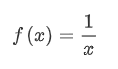

Мы можем использовать в качестве аргумента для этой функции любое число, кроме нуля, так как на ноль делить нельзя. Это значит, что областью определения нашей функции является **множество всех вещественных чисел за исключением нуля**.

Более строго, математически, это утверждение можно записать следующим образом:

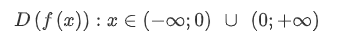

$D(f(x))$ здесь читается как «область определения функции $f(x)$».



В качестве  примера также можно рассмотреть график для функции

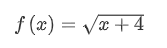

Мы видим, что график начинается из точки -4 и идёт вправо. Левее точки -4 мы не наблюдаем никаких частей графика функции, т. к. область определения этой функции не включает значения меньше -4.

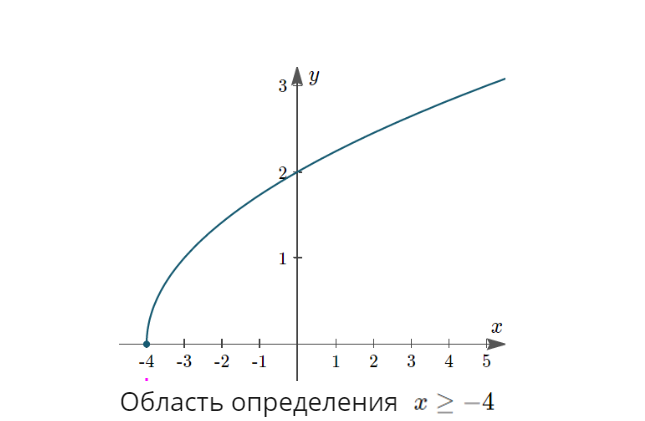

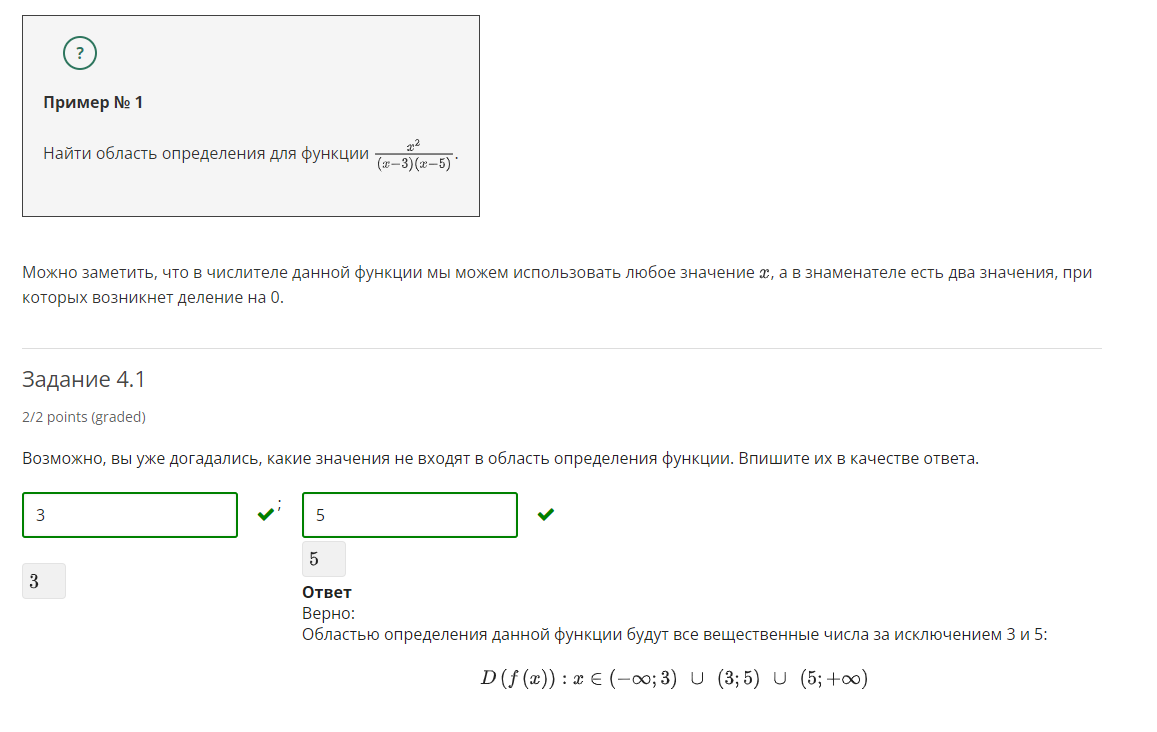

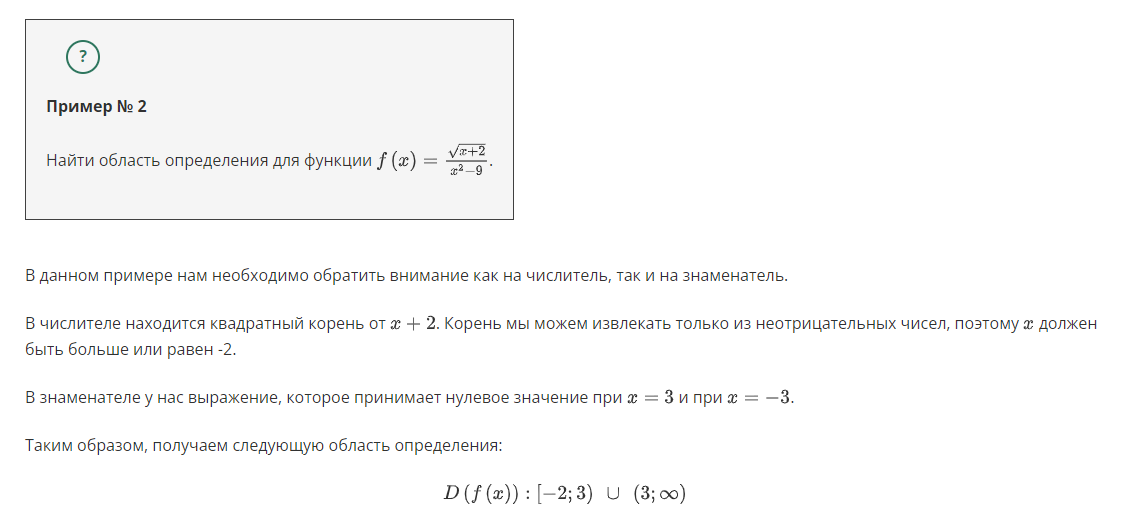

Мы рассмотрели ограничения для знаменателя дроби и квадратного корня. Но есть также ограничения, которые касаются **логарифма**. В основании логарифма не может быть неположительное число или единица, а показателем логарифма должно быть положительное число:

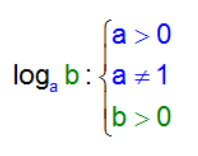

Ограничения на показатель логарифма наглядно видно на графике логарифмической функции:

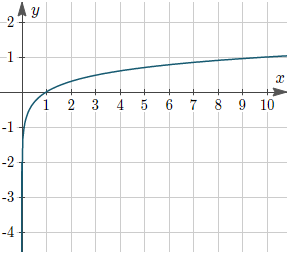

Отметим, что график не пересекает ось ординат, а лишь бесконечно близко приближается к ней.

Здесь уместно вспомнить про логарифмическое преобразование асимметрично распределённых признаков, с которым вы сталкивались ранее. Теперь мы явно видим, что область определения логарифмической функции — (0;∞), а значит мы не можем применять это преобразование к признакам, среди которых есть отрицательные значения.

### Таким образом, если вы понимаете, какая у функции область определения, вы всегда сможете отследить, по какой причине некорректно сработал метод, или заранее оценить, можно ли использовать те или иные данные в качестве аргумента для какой-то функции.

Разумеется, мы можем вычислять область определения и с помощью библиотеки Python для символьных вычислений, с которой мы познакомились ранее — SymPy.

Например, рассчитаем область определения для функции $f(x) = 1/x$

In [1]:
from sympy import Symbol, S #импортируем нужные функции для обозначения переменных
from sympy.calculus.util import function_range #импортируем функцию для поиска области значения
from sympy.calculus.util import continuous_domain #импортируем функцию для поиска области определения
x = Symbol("x") #определяем нашу переменную
f = 1/x #определяем нашу функцию
continuous_domain(f, x, S.Reals) #вычисляем область определения

Union(Interval.open(-oo, 0), Interval.open(0, oo))

Для функции $f(x) = log(x)/x$

In [2]:
from sympy import log
x = Symbol("x")
f = log(x)/x
continuous_domain(f, x, S.Reals)

Interval.open(0, oo)

# **ОБЛАСТЬ ЗНАЧЕНИЙ ФУНКЦИИ**

Теперь, когда мы разобрались с областью определения функции, мы можем перейти к поиску области значений функции.

### Под **областью значений** функции понимаются все значения, которые она может принимать.

Например, возможно, вы помните, что синус или косинус никогда не могут быть меньше -1 или больше 1. Это очень хорошо видно на графике:

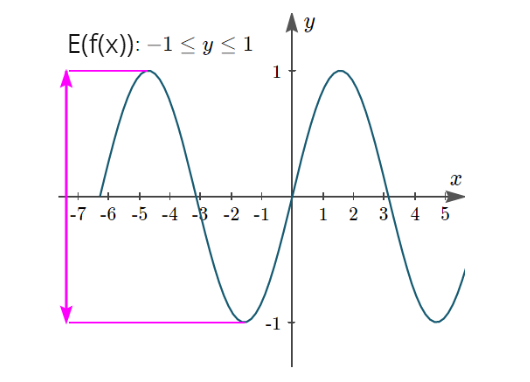

Видно, что область значений — от -1 до 1 включительно. Формально это можно записать следующим образом:

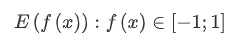

$E(f(x))$ читается как «область значений функции $f(x)$».

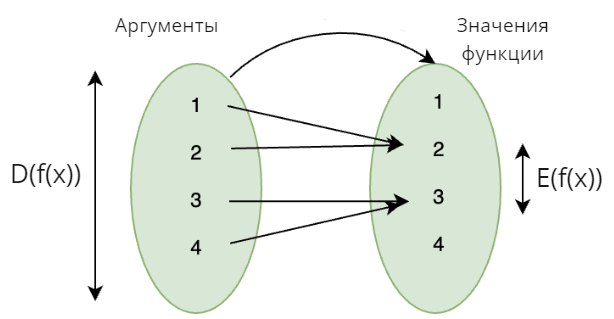

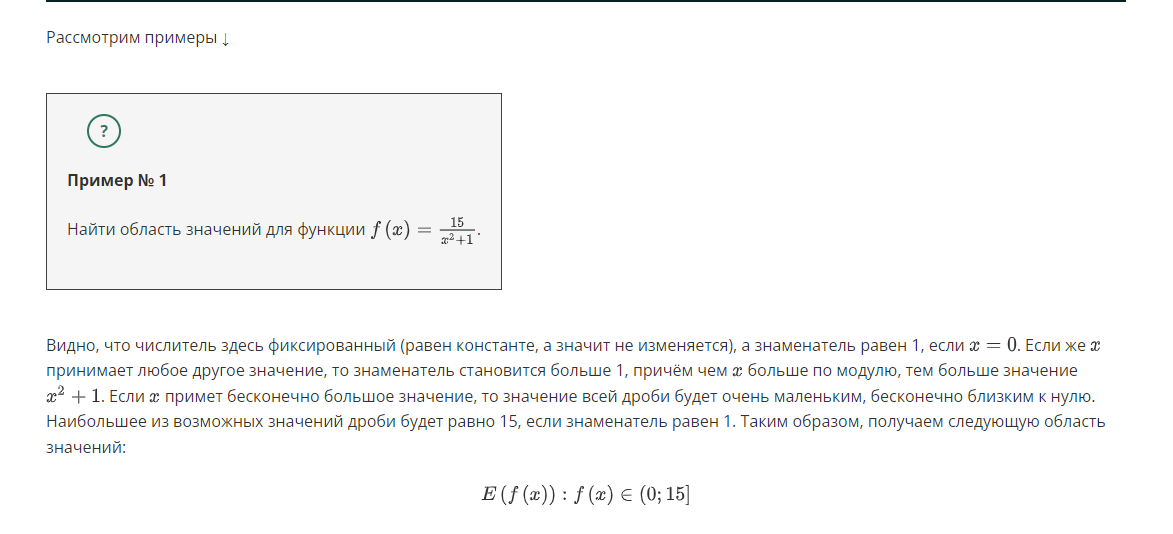

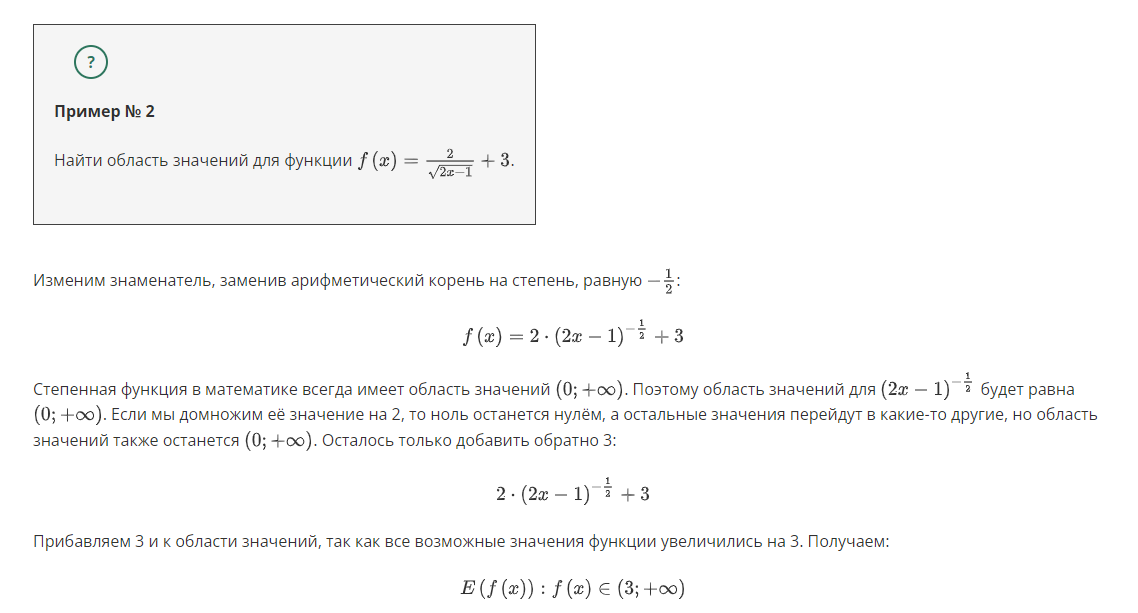

Разумеется, область значений мы также можем найти с помощью библиотеки SymPy. Например, сделаем это для функции $sin(x)$:

In [4]:
from sympy.calculus.util import function_range
from sympy import sin
x = Symbol("x") 
f = sin(x) 
function_range(f, x, S.Reals)

Interval(-1, 1)

Или для более сложной функции $f(x) = (x^2-3)/e^x$



In [5]:
from sympy import Symbol, S #импортируем нужные функции для обозначения переменных
from sympy.calculus.util import function_range #импортируем функцию для поиска области значений
from sympy import exp #добавляем функцию для вычисления экспоненциальной функции
x = Symbol("x")
f = (x*x-3)/(exp(x))
function_range(f, x, S.Reals)

Interval(-2*E, oo)

# **ТОЧКИ ПЕРЕСЕЧЕНИЯ С ОСЯМИ АБСЦИСС И ОРДИНАТ**

Следующий важный шаг в исследовании функции — это поиск точек, в которых функция пересекает ось абсцисс (горизонтальная ось) и ось ординат (вертикальная ось).

Давайте посмотрим на график ниже. Можно отметить, что в точках, где график пересекает ось x, координата по y равна нулю. И наоборот — в точках пересечения с осью ординат уже координаты по x принимают значение 0.

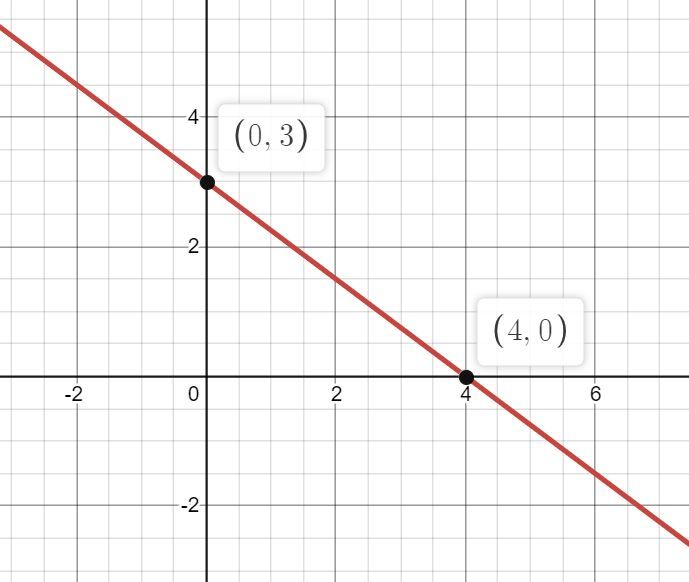

Эта удобная особенность позволяет без проблем находить пересечения с осями.



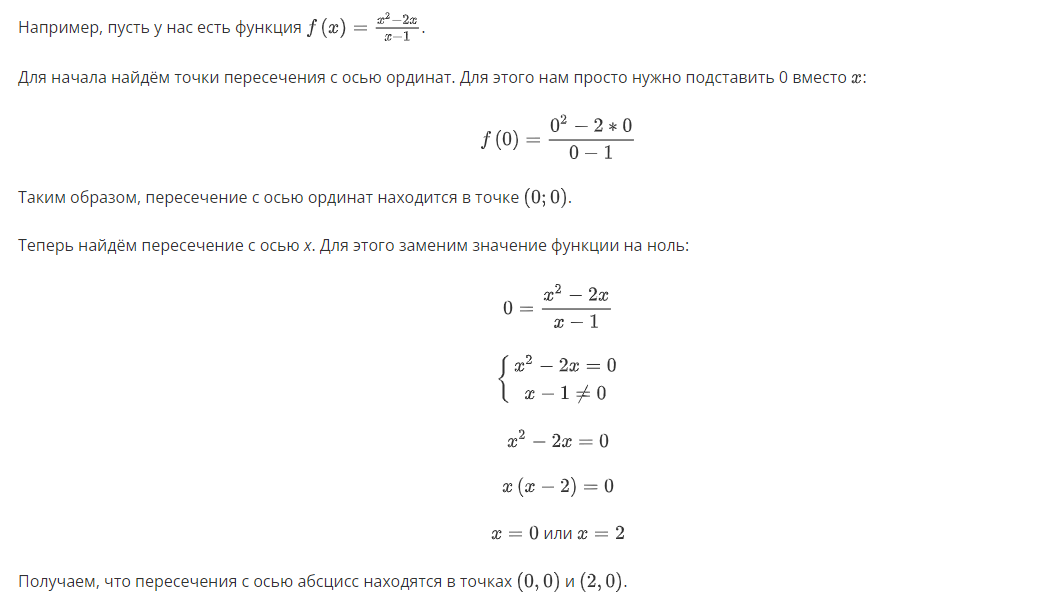

Для того чтобы найти эти точки пересечения, мы также можем использовать библиотеку SymPy. Например, найдём точки пересечения для функции:

$f(x) = x^2 + 5x + 4$

Сначала найдём точку пересечения с осью ординат. Для этого просто подставим 0 вместо значения $x$:

In [6]:
x = Symbol("x")
f = x*x+5*x+4
f.subs(x, 0)

4

Теперь найдём точку пересечения с осью абсцисс. Для этого решим уравнение, в котором приравняем нашу функцию к нулю:

In [7]:
from sympy import solveset, Eq
solveset(Eq(x*x+5*x+4, 0), x)

FiniteSet(-4, -1)

Итак, мы получили, что наша функция $f(x) = x^2 + 5x + 4$ пересекается с осью ординат в точке (0;4) , а с осью абсцисс — в точках (-4;0) и (-1;0).

# **ИССЛЕДОВАНИЕ ФУНКЦИИ НА ЧЁТНОСТЬ И НЕЧЁТНОСТЬ**

В нашем исследовании остался ещё один пункт — исследование на чётность и нечётность. Давайте разберёмся, какие функции называют **чётными**, а какие — **нечётными**.

## Функция является **чётной**, если $f(x) = f(-x)$ для всех значений $x$. Это означает, что функция одинакова для оси х, и на положительной и отрицательной полуплоскостях она симметрична относительно оси у.

Например, функция $y=x^2$ является примером чётной функции:

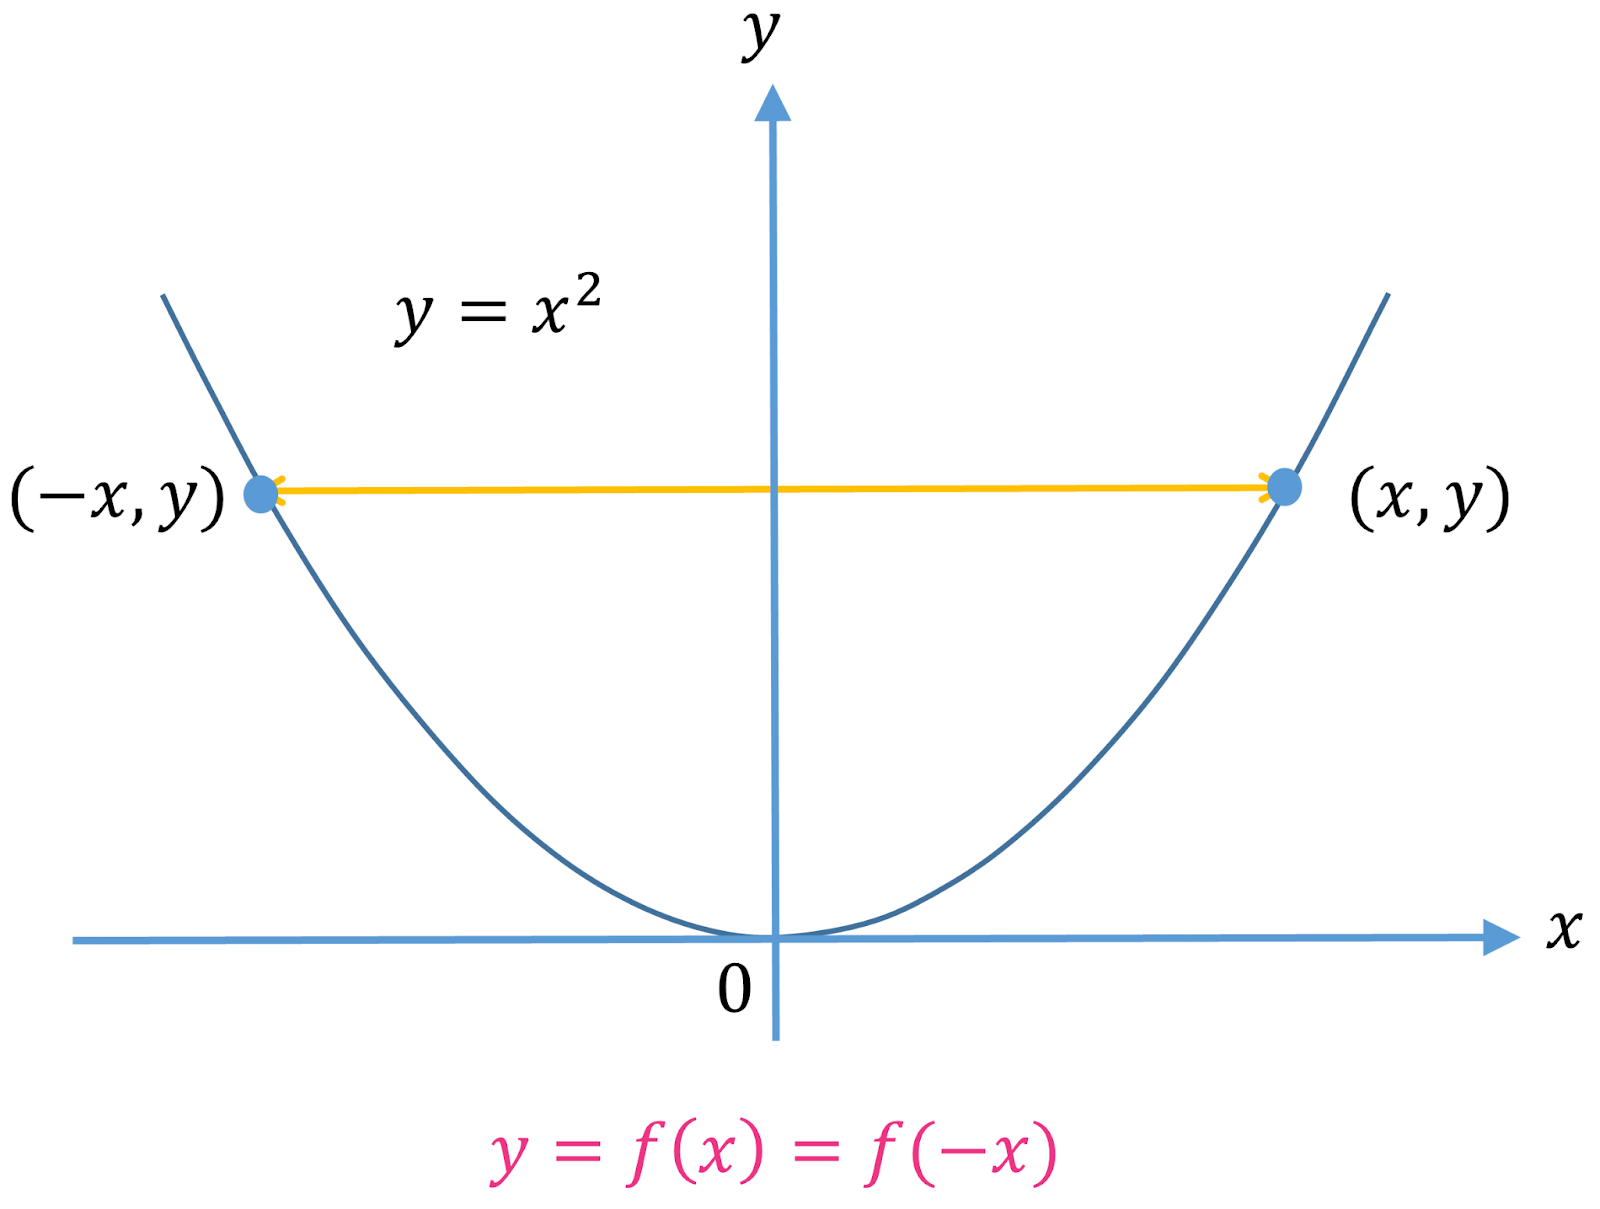

Можно заметить, что функция симметрична относительно оси у, а также, что её значения в точках $x$ и $-x$  равны. Она принимает одно и то же значение для 3 и -3, для 2 и -2, для 4 и -4 и так далее.

Ещё одним примером чётной функции является функция $f(x) = |x|$, так как функция модуля принимает одинаковое значение для $x$ и $-x$.

## Функция является **нечётной**, если $-f(x) = f(-x)$ для всех $x$.

График нечётной функции будет симметричен относительно начала координат. Например, функция $f(x) = x^3$ является нечётной:

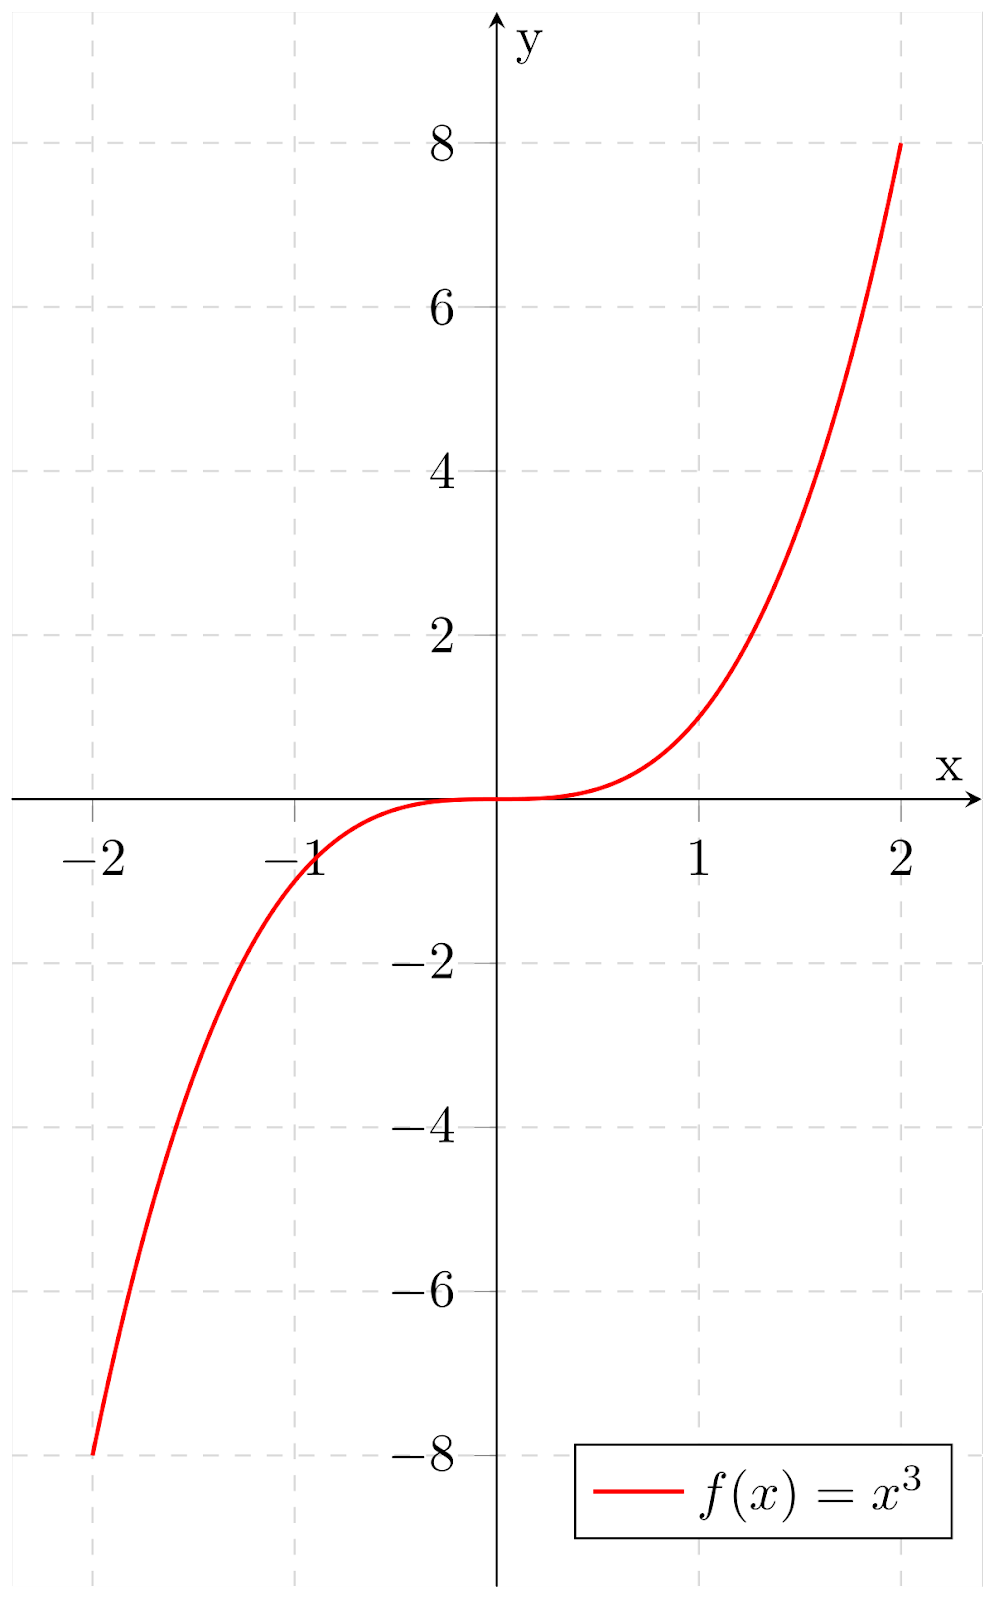


Давайте попробуем исследовать несколько функций на чётность и нечётность.

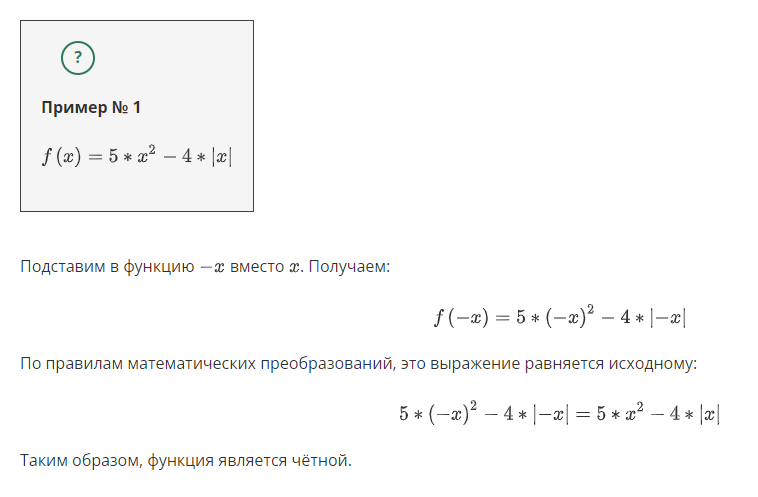

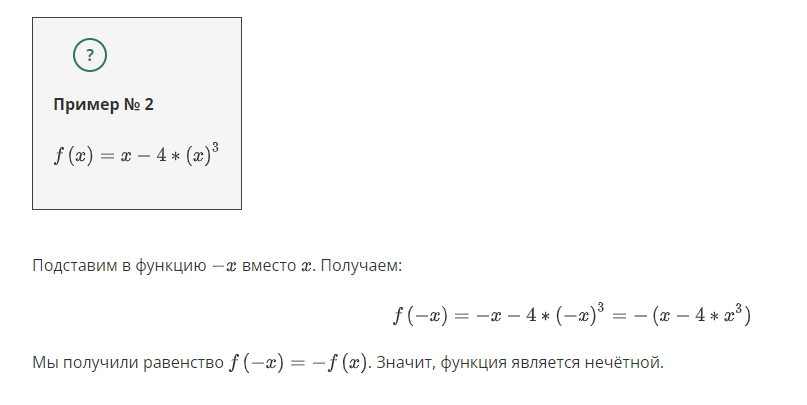

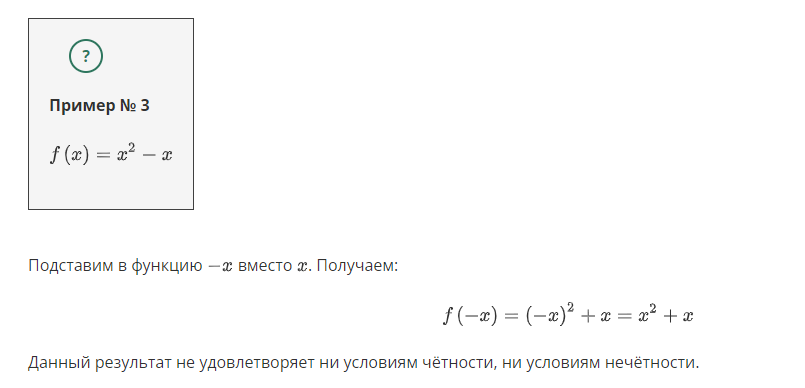

→ Мы рассмотрели, какие функции являются чётными, а какие — нечётными. Важно отметить, что эта информация нужна не только для исследования конкретной функции. Подобная классификация функций важна в ряде областей математики, например в анализе Фурье, которые широко используется для анализа сигналов.

✍ Итак, теперь мы можем найти для любой функции область определения и область значений, точки пересечения с осями и узнать, является функция чётной или нечётной. Уже в следующем юните вы познакомитесь с производными и приблизитесь к полному подробному анализу функции.



## Задание 4.6

In [8]:
from sympy import Symbol, S
from sympy import solveset, Eq
x = Symbol("x")
solveset(Eq(x*x+2*x-8, 0), x)

FiniteSet(-4, 2)

## Задание 4.7

In [9]:
from sympy import Symbol, S #импортируем нужные функции для обозначения переменных
from sympy.calculus.util import function_range
x = Symbol("x")
f = 3/(x*x-10)
function_range(f, x, S.Reals)

Union(Interval(-oo, -3/10), Interval.open(0, oo))